# Networks 4, Advanced Measures

---

#### **Exercise: Plot the Network using ForceAtlas2. For visualization, you should work with the network from last time, the Giant Connected Component ... and the undirected version.**

---

In [23]:
#  Loading the graph from Github as decribed in the exercise
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import requests
import random

url = r"https://raw.githubusercontent.com/noanorgaard/SocialGraphs/refs/heads/main/Assignment1/rock_music_graph1.graphml"# Loading graph from a GraphML file from a URL

data = requests.get(url).text   # decode to string, not bytes
G = nx.parse_graphml(data)

# largest connected component
largest_cc = max(nx.weakly_connected_components(G), key=len)
G = G.subgraph(largest_cc).copy()

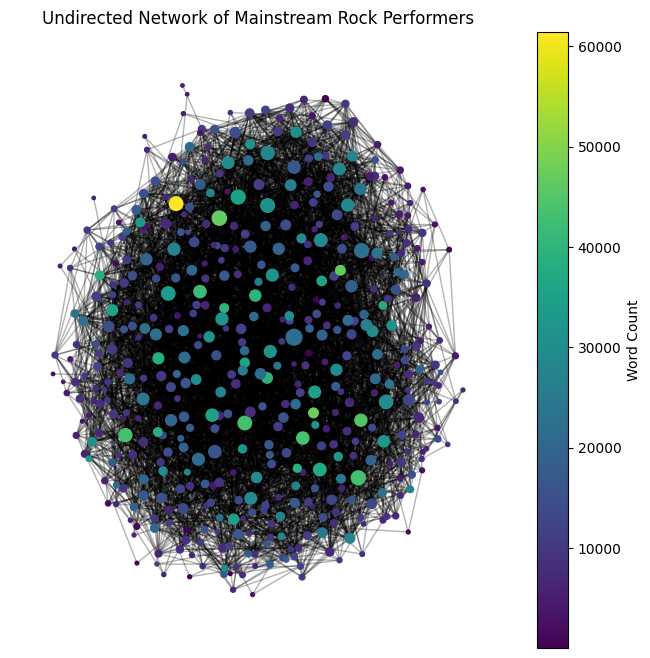

In [24]:
#Visualize the network using NetworkX
#Node color should depend on the length_of_content attribute (see notes from last week).
#Node size should depend on the node degree
#Play with the force atlas algorithm parameters to obtain a visualization you like.

# convert directed graph to undirected graph
G_undirected = G.to_undirected()

# plot the undirected graph
plt.figure(figsize=(8,8))
# pos = nx.spring_layout(G_undirected, seed=42, k = 0.8)  # positions for all 
pos = nx.forceatlas2_layout(G_undirected, seed=42, strong_gravity=True)  # positions for all nodes
# node sizes based on degree

node_sizes = [5 + 1 * G_undirected.degree(n) for n in G_undirected.nodes()]
# node colors based on word count (content length)
node_colors = [G_undirected.nodes[n]['word_count'] for n in G_undirected.nodes()]
nodes = nx.draw_networkx_nodes(G_undirected, pos, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.viridis)
edges = nx.draw_networkx_edges(G_undirected, pos, alpha=0.3)
plt.colorbar(nodes, label='Word Count')
plt.title('Undirected Network of Mainstream Rock Performers')
plt.axis('off')
plt.show()

---

#### **Exercise 2: We continue with a qualitative inspection of the Wikipedia pages. Inspecting the data manually will develop intuitions that will help us to intepret our quantitative results. We investigate the reasons for links between characters to exist on Wikipedia.**


1. Consider the nodes with highest in-degree in the network. Open the corresponding Wikipedia page.
    - Consider the set of neighbours pointing towards the node found above.
    - What is the relation between the band/mucisians you identified and their network neighbours? (e.g. did they sing a song together, did one write a song for the other?, etc ...). You don't need to come up with a grand theory of Rock Music here, I just want you to think about how links arise, why the links are there.
    - Repeat the exercise for the highest out-degree node.
    - Are there differences between reasons for out- and in-links? Again, there's no right answer here. I just want you to think about some of the reasons why links may occur in Wikipedia. Answer in your own words.
2. Create a scatter plot, where each node is a point, and the axes show in- versus out-degree. That way you can visually inspect the patterns of how in- and out-degree are connected across all the nodes in the network. Comment on what you see.
3. Are there any nodes with high(ish) out-degree and with few incoming connections? If yes, open WikiPages of those bands/mucisians and explain what happens?
4. Are there any nodes with high in-degree and few going connections? Again, open the WikiPages corresponding to those nodes and explain what happens?

---

#### punkt 1

In [25]:
# node with max in degree
max_in_degree_node = max(G.nodes, key=lambda n: G.in_degree(n))
print(f"Node with max in-degree: {max_in_degree_node}, In-Degree: {G.in_degree(max_in_degree_node)}")

# neighbors pointing to the node with max in degree
neighbors = list(G.predecessors(max_in_degree_node))
print(f"Neighbors pointing to {max_in_degree_node}: {neighbors}")





Node with max in-degree: Led_Zeppelin, In-Degree: 117
Neighbors pointing to Led_Zeppelin: ['311_(band)', 'ABBA', 'Bryan_Adams', 'Aerosmith', 'Alice_in_Chains', 'The_Allman_Brothers_Band', 'Alter_Bridge', 'Arctic_Monkeys', 'Audioslave', 'Avenged_Sevenfold', 'Bachman–Turner_Overdrive', 'Bad_Company', 'The_Band', 'The_Black_Crowes', 'Black_Sabbath', 'Blur_(band)', 'Bon_Jovi', 'Jeff_Buckley', 'Bullet_for_My_Valentine', 'Bush_(British_band)', 'Cheap_Trick', 'Eddie_Cochran', 'Coheed_and_Cambria', 'Phil_Collins', 'Alice_Cooper', 'Chris_Cornell', 'Cream_(band)', 'Creed_(band)', 'The_Cult', 'Deep_Purple', 'Def_Leppard', 'Fats_Domino', 'Donovan', 'Drowning_Pool', 'Duran_Duran', 'Electric_Light_Orchestra', 'Europe_(band)', 'The_Everly_Brothers', 'Faith_No_More', 'FireHouse', 'Foo_Fighters', 'Foreigner_(band)', 'Godsmack', 'Golden_Earring', 'Greta_Van_Fleet', "Guns_N'_Roses", 'Heart_(band)', 'Hinder', 'INXS', 'Iron_Maiden', "Jane's_Addiction", 'Jethro_Tull_(band)', 'Judas_Priest', 'Kaiser_Chiefs',

Artic monkeys are compared to Led Zeppelin in a quote on our wiki page. "The co-founder of the band's label Domino Records, Laurence Bell, said "They're the toast of the playground again, every 13-year-old loves them. But so do grandads who were into Led Zeppelin."

Black sabbath was influenced by led zeppelin.

Jack white, "in elementary school, he began listening to the Doors, Pink Floyd, and Led Zeppelin.".

Pearl jam, "Industry insiders compared Pearl Jam's tour that year to the touring habits of Led Zeppelin in that the band "ignored the press and took its music directly to the fans"." AND "Pearl Jam has cited many classic rock bands and artists as influences, including the Beatles,[179] the Who,[179] Bruce Springsteen, Aerosmith, Led Zeppelin"


ABBA, "The studio was used by several other bands: notably, Genesis' Duke, Led Zeppelin's In Through the Out Door and Scorpions's Lovedrive were recorded there." AND "During the appearance, they re-emphasised that they intended never to officially reunite, citing the opinion of Robert Plant that the re-formed Led Zeppelin was more like a cover band of itself than the original band."


In [26]:
# node with max out degree
max_out_degree_node = max(G.nodes, key=lambda n: G.out_degree(n))
print(f"Node with max out-degree: {max_out_degree_node}, Out-Degree: {G.out_degree(max_out_degree_node)}")

# neighbors pointing to the node with max out degree
neighbors = list(G.successors(max_out_degree_node))
print(f"Neighbors pointing to {max_out_degree_node}: {neighbors}")

Node with max out-degree: Alice_in_Chains, Out-Degree: 71
Neighbors pointing to Alice_in_Chains: ['Nirvana_(band)', 'Pearl_Jam', 'Soundgarden', "Guns_N'_Roses", 'David_Bowie', 'Van_Halen', 'Iggy_Pop', 'Poison_(American_band)', 'Extreme_(band)', 'Anthrax_(American_band)', 'Megadeth', 'Slayer', 'Heart_(band)', 'Chris_Cornell', 'Ozzy_Osbourne', 'Metallica', 'Kiss_(band)', 'Lynyrd_Skynyrd', 'Pink_Floyd', 'The_Cult', 'Tool_(band)', 'Puddle_of_Mudd', 'Pantera', 'Velvet_Revolver', 'Led_Zeppelin', 'The_Doors', 'Foo_Fighters', 'Elton_John', 'Nine_Inch_Nails', 'Lamb_of_God_(band)', 'Avenged_Sevenfold', 'Deftones', 'Rush_(band)', 'Korn', 'Dallas_Green_(musician)', 'Black_Sabbath', 'Deep_Purple', 'AC/DC', 'Accept_(band)', 'Aerosmith', 'The_Beatles', 'Dio_(band)', 'Funkadelic', 'Jimi_Hendrix', 'Iron_Maiden', 'Jethro_Tull_(band)', 'Eddie_Money', 'Ted_Nugent', 'Pixies_(band)', 'Queen_(band)', 'Scorpions_(band)', 'Thin_Lizzy', 'U2', 'ZZ_Top', 'Godsmack', 'Staind', 'Three_Days_Grace', '10_Years_(band)'

Pearl jam, "The video was released on April 3, 2013, and also features cameos by Ann and Nancy Wilson from Heart, Mike McCready from Pearl Jam...."

David Bowie, "In addition, members of Alice in Chains have cited artists including AC/DC,[290][292] Accept,[293][294] Aerosmith,[295] The Beatles,[292] Black Flag,[296] David Bowie, ...." AND "Two weeks after the band's formation, they were playing a gig at Washington State University, trying to fill in a 40-minute set with a couple of original songs along with Hanoi Rocks and David Bowie covers."

10 years (band), "Other bands that have been influenced by Alice in Chains include 10 Years,[336] Avenged Sevenfold,[337], ..."




**Difference in reason for out and in degrees**

There is a lot of out and in degrees that are linked because of insperation and citation. A in degree is just an out degree somewhere else.  


#### punkt 2

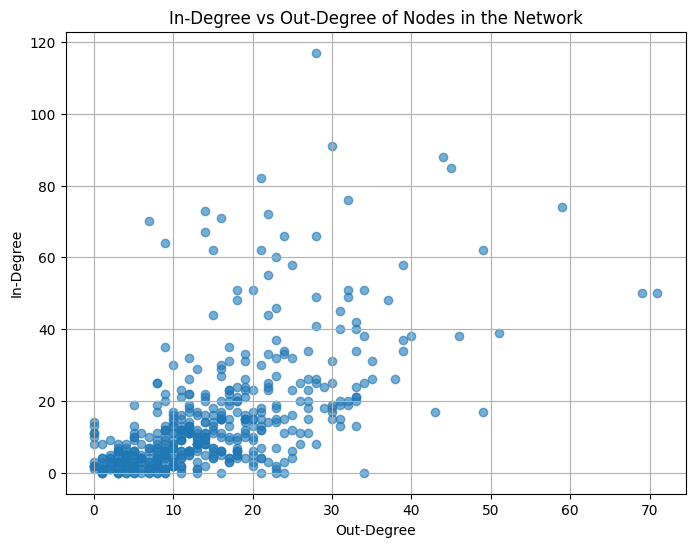

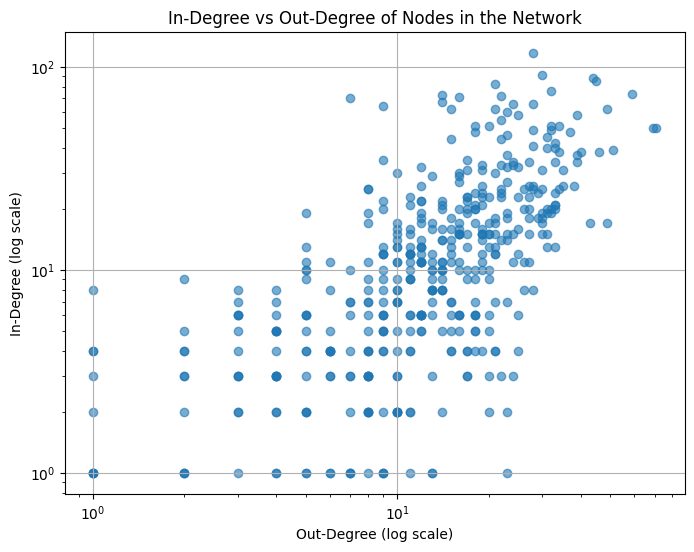

In [27]:
# Create a scatter plot, where each node is a point, and the axes show in- versus out-degree. 
# That way you can visually inspect the patterns of how in- and out-degree are connected across all the nodes in the network. 
# Comment on what you see.

in_degrees = [G.in_degree(n) for n in G.nodes()]
out_degrees = [G.out_degree(n) for n in G.nodes()]

# non log
plt.figure(figsize=(8,6))
plt.scatter(out_degrees, in_degrees, alpha=0.6)
plt.xlabel('Out-Degree')
plt.ylabel('In-Degree')
plt.title('In-Degree vs Out-Degree of Nodes in the Network')
plt.grid(True)
plt.show()

# log scale
plt.figure(figsize=(8,6))
plt.scatter(out_degrees, in_degrees, alpha=0.6)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Out-Degree (log scale)')
plt.ylabel('In-Degree (log scale)')
plt.title('In-Degree vs Out-Degree of Nodes in the Network')
plt.grid(True)
plt.show()




The nodes are clustered in the bottom left corner, meaning that most nodes have low out or/and in degree. There is a slight linear tendency, where most nodes has a higher out degree then in degree. There is a handfull, that has evidently higher in and/or out degrees than the others. 

On the log scale plot, the linear trend is more evident.

#### punkt 3 og 4

In [28]:
# There is one node with high outdegree (above 30) but low indegree (= 0).
# Find this node:
special_node_low_in = [n for n in G.nodes() if G.out_degree(n) > 30 and G.in_degree(n) == 0]

# There is two nodes with in degree above 60 and out degree below 10.
special_nodes_low_out = [n for n in G.nodes() if G.in_degree(n) > 60 and G.out_degree(n) < 10]


print(f"Node with high out-degree and zero in-degree: {special_node_low_in}")
print(f"Nodes with high in-degree and low out-degree: {special_nodes_low_out}")



Node with high out-degree and zero in-degree: ['Mötley_Crüe']
Nodes with high in-degree and low out-degree: ['Pink_Floyd', 'Elvis_Presley']


Low in degree, means that no other band has been inspired by them, made music with them, quoted them or mentioned them. Though their wiki page is quite extensive and wellmade with links to lots of bands that they have been inspired by or what other bands have said about them and/or their music (high out degree). 


High in degree bands, are then the very well know bands, that has inspired the music industry a lot. Many other bands have drawn inspiration from them and/or commented on their music and/or cited them. THe low out degree for these bands is not because they have a lacking wiki page (as they are very famous), but they seem to only draw inspiration from few other bands, their page is much about their history and not about who said what about them. 

---
# Part B: Advanced tools
---



#### **Exercise 3: Last time we visually analyzed (plotted) the degree distributions of our network. Now, let's analyze it using some of the tools from previous lectures. For this exercise we are going to look at the directed graph (rememeber, we asked you to keep one?).**

1. What are the average, median, mode, minimum and maximum value of the in-degree? And of the out-degree? How do you intepret the results?
2. Let's also look at the exponent of the degree distribution
    - To calculate it, you can install powerlaw package (I could not install in conda, so I used pip install powerlaw)
    - Use powerlaw.Fit(degree).alpha for fitting
    - Find the degree exponent for in-, out- and total- degree distribution. Think about what you learned in the book - what does each exponent say about our network?
    - When analyzing the plots of in- and out- degree distribution last week, did you come up to the same conclusions?
    - Reflect on the whole power-law thing. Are the degree distributions even power laws? Could a log-normal or exponential distribution be better? How would you find out what the right function to describe the various degree distributions are?
    - A long time ago, a group of scientists analyzed the network spanned by all of Wikipedia (the paper is called Wikipedias: Collaborative web-based encyclopedias as complex networks; to access this paper, use findit.dtu.dk or read the preprint on arXiv). Do your findings correspond to the results described in Chapter III.A of that paper? If not, try to give your explanation of why?
3. Plot a heatmap (Hint here) of the the in- versus out- degree for all characters. Zoom in on just the in-degree 
 and out-degree [0,20] area of the plot. What is the advantage of using a heatmap over the scatter plot from the previous Exercise (especially for understanding what's going on in this area)?
4. Why do you think I want you guys to use a directed graph? Are there questions we can ask using the directed graph that are not possible to answer in the undirected version? Which questions? Can you think of examples when the in/out distinction doesn't matter.
5. We have one more metric that we have used, but not investigated so far. The node-attribute length_of_content. There are two things to look at.
    - Firstly, we can verify that more text means more links. If that's true the length should correlate with out-degree. Does it?
    - Secondly, and more interestingly, it could be that longer texts means more famous characters. And that means more in-links.
    - How should you test this? Well, here you are allowed to be creative. You may choose the method of your liking to study this question (e.g. look at it visually, test the correlation using spearman or pearson correlations, fit a curve to the data, you decide). Are both questions true? If yes, which phenomenon is stronger? Explain your results in your own words.

---

#### punkt 1

In [29]:
# What are the average, median, mode, minimum and maximum value of the in-degree? 
# And of the out-degree? How do you intepret the results?

import statistics

# In-degree statistics
in_degrees_largest = [G.in_degree(n) for n in G.nodes()]
avg_in_degree = round(np.mean(in_degrees_largest), 2)
median_in_degree = round(np.median(in_degrees_largest), 2)
mode_in_degree = round(statistics.mode(in_degrees_largest), 2) # the most common in-degree (where the distribution peaks)
min_in_degree = round(np.min(in_degrees_largest), 2)
max_in_degree = round(np.max(in_degrees_largest), 2)

# print in-degree stats
print(f"In-Degree - Avg: {avg_in_degree}, Median: {median_in_degree}, Mode: {mode_in_degree}, Min: {min_in_degree}, Max: {max_in_degree}")

# Out-degree statistics
out_degrees_largest = [G.out_degree(n) for n in G.nodes()]
avg_out_degree = round(np.mean(out_degrees_largest), 2)
median_out_degree = np.median(out_degrees_largest)
mode_out_degree = statistics.mode(out_degrees_largest)
min_out_degree = np.min(out_degrees_largest)
max_out_degree = np.max(out_degrees_largest)

# print out-degree stats
print(f"Out-Degree - Avg: {avg_out_degree}, Median: {median_out_degree}, Mode: {mode_out_degree}, Min: {min_out_degree}, Max: {max_out_degree}")

In-Degree - Avg: 14.86, Median: 10.0, Mode: 4, Min: 0, Max: 117
Out-Degree - Avg: 14.86, Median: 13.0, Mode: 9, Min: 0, Max: 71


Average: the average is of course the same as the total in degree equals total out degree in the whole network. (Alle edeges are an in degree in one place and a out in another)

Median: the out degree median is higher than for in degree, meaning that there are more low in degress than out degrees.

Mode: the peak of the distribution is at 4 and 9 respectively, which means that the highest density of in degree is lower than out. This also backs the statment fra the median.

Min: same for both.

Max: in degree is higher, which makes sense as it has a lot of low indegree nodes, hereby a few must be hubs/outliers that has a lot of links coming to it. Some of the nodes must "consume" a lot of links for the majority to have very few.

The out degree dist. is closer to normally distributed, as the median, average and mode are closer together, than for the in degree dist. 

#### punkt 2

In [35]:
# Let's also look at the exponent of the degree distributions
# Use powerlaw.Fit(degree).alpha for fitting

import powerlaw

#Find the degree exponent for in-, out- and total- degree distribution. 
# Think about what you learned in the book - what does each exponent say about our network?

in_fit = powerlaw.Fit(in_degrees_largest, discrete=True) # discrete=True because degrees are integers
out_fit = powerlaw.Fit(out_degrees_largest, discrete=True) # discrete=True because degrees are integers

total_degrees_largest = [G_undirected.degree(n) for n in G_undirected.nodes()]
total_fit = powerlaw.Fit(total_degrees_largest, discrete=True) # discrete=True because degrees are integers

print(f"In-Degree Power Law Exponent (alpha): {in_fit.alpha}")
print(f"Out-Degree Power Law Exponent (alpha): {out_fit.alpha}")
print(f"Total Degree Power Law Exponent (alpha): {total_fit.alpha}")




Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
In-Degree Power Law Exponent (alpha): 2.5704147223402742
Out-Degree Power Law Exponent (alpha): 5.10394875199376
Total Degree Power Law Exponent (alpha): 3.468060547979265


Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values


- Scale-Free Regime (2 < γ < 3)
    - Ultra small world
    - For γ = 2, $k_{max} \sim N$
    - Here the mean of the degree distribution is finite, but higher moments such as the variance are not finite.  
    - scale-free networks with heavy tails; hubs dominate, variance diverges.
- Random Network Regime (γ > 3)
    - Small world
    - Indistinguishable from a random network
    - For γ > 3 both the first and the second moments are finite.  
    - resembles a random network; hubs are less important, variance is finite.

From the above estimated alphas, we see that the in degree dist. is in the scale free regime, ultra small world. 
The out degree and the total degree distributions are in the random network regime, small world. 

Last week, looking at the distributions, it matched this conclusion. 
The distribution of the in-deg. was heavily skewed with a heavy tail. There was a few important big hubs. The variance was big.
The dist. of out deg. had almost no important hubs and looked more normally distributed, only lightly skewed. 




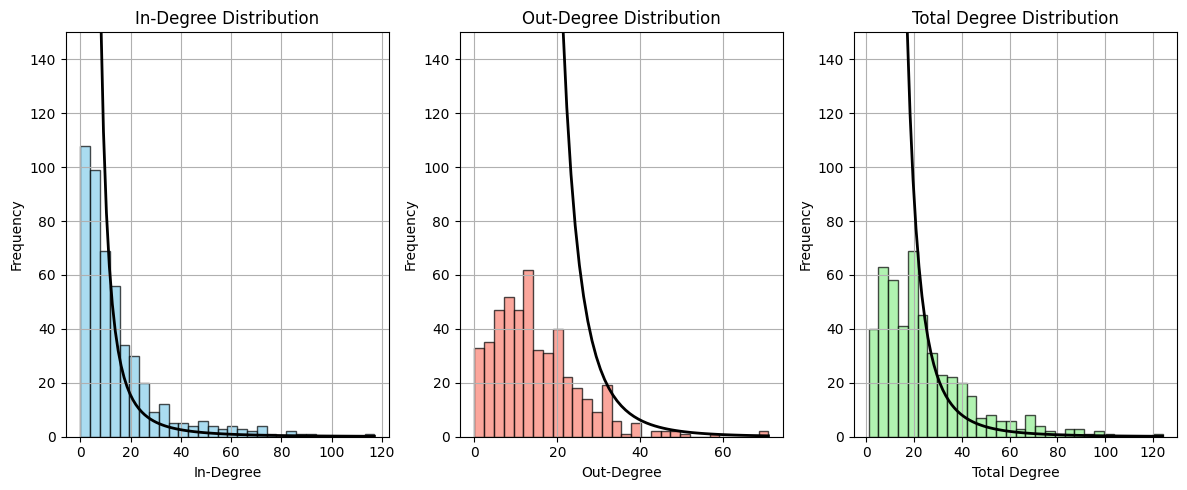

In [ ]:
# plot degree distributions (no log scale) with the fitted power law distributions
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.hist(in_degrees_largest, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
# plot power law fit on top of the histogram
x = np.linspace(1, max(in_degrees_largest), 100)
y = in_fit.power_law.xmin**(in_fit.alpha - 1)* x**(-in_fit.alpha) * len(in_degrees_largest)
plt.plot(x, y, color='black', linewidth=2)
# set range on y-axis to better see the fit
plt.ylim(0, 150)
plt.xlabel('In-Degree')
plt.ylabel('Frequency')
plt.title('In-Degree Distribution')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.hist(out_degrees_largest, bins=30, color='salmon', edgecolor='black', alpha=0.7)
# plot power law fit on top of the histogram
x = np.linspace(1, max(out_degrees_largest), 70)
y = x**(-out_fit.alpha) * out_fit.power_law.xmin**(out_fit.alpha - 1) * len(out_degrees_largest)
plt.plot(x, y, color='black', linewidth=2)
# set range on y-axis to better see the fit
plt.ylim(0, 150)
plt.xlabel('Out-Degree')
plt.ylabel('Frequency')
plt.title('Out-Degree Distribution')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.hist(total_degrees_largest, bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
# plot power law fit on top of the histogram
x = np.linspace(1, max(total_degrees_largest), 100)
y = x**(-total_fit.alpha) * total_fit.power_law.xmin**(total_fit.alpha - 1) * len(total_degrees_largest)
plt.plot(x, y, color='black', linewidth=2)
# set range on y-axis to better see the fit
plt.ylim(0, 150)
plt.xlabel('Total Degree')
plt.ylabel('Frequency')
plt.title('Total Degree Distribution')
plt.grid(True)
plt.tight_layout()
plt.show()

Reflect on the whole power-law thing. Are the degree distributions even power laws? Could a log-normal or exponential distribution be better? How would you find out what the right function to describe the various degree distributions are?

The in-degree especially fits nicely, the others do not as they increase before decreasing and that does not resemble a powerlaw.

NB: vi forstår ikke hvorfor der ikke er ganget (gamma -1) på distribution kurverne (de sorte). 

**MANGLER 2 underpunkter**

#### punkt 3

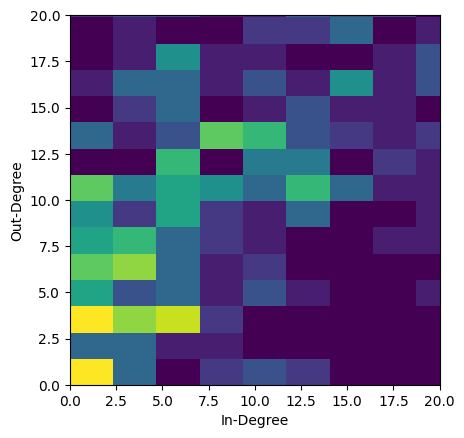

In [72]:
#Plot a heatmap (Hint here) of the the in- versus out- degree for all characters. 
# Zoom in on just the in-degree [0,20] and out-degree [0,20] area of the plot. 
# What is the advantage of using a heatmap over the scatter plot from the previous Exercise 
# (especially for understanding what's going on in this area)?

# heatmap of in-degree vs out-degree
heatmap, xedges, yedges = np.histogram2d(in_degrees_largest, out_degrees_largest, bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.ylim(0, 20)
plt.xlim(0, 20)
plt.xlabel('In-Degree')
plt.ylabel('Out-Degree')
plt.show()


There is a slight linear trend, meaning that nodes with high indegree also have high outdegree. Though, most nodes have a slightly higher in out degree than indegree. 

#### punkt 4

Why do you think I want you guys to use a directed graph? Are there questions we can ask using the directed graph that are not possible to answer in the undirected version? Which questions? Can you think of examples when the in/out distinction doesn't matter.



#### punkt 5 

We have one more metric that we have used, but not investigated so far. The node-attribute length_of_content. There are two things to look at.

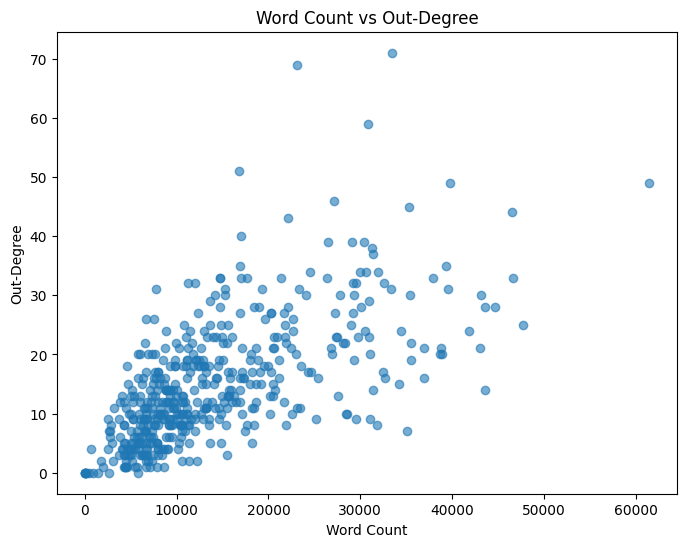

Correlation between Word Count and Out-Degree: 0.6460938101119539
Pearson Correlation between Word Count and Out-Degree: 0.646093810111954
Spearman Correlation between Word Count and Out-Degree: 0.6901098948852157


In [80]:
from scipy import stats

# for each node in the directed graph, we have an attribute word_count, extract this attribute for all nodes and plot its distribution.
word_counts = [G.nodes[n]['word_count'] for n in G.nodes()]

# plot word count vs out degree
plt.figure(figsize=(8,6))
plt.scatter(word_counts, out_degrees, alpha=0.6)
plt.xlabel('Word Count')
plt.ylabel('Out-Degree')
plt.title('Word Count vs Out-Degree')
plt.show()


# pearson correlation
pearson_correlation = stats.pearsonr(word_counts, out_degrees)[0]
# spearman correlation
spearman_correlation = stats.spearmanr(word_counts, out_degrees)[0]

print(f"Pearson Correlation between Word Count and Out-Degree: {pearson_correlation}")
print(f"Spearman Correlation between Word Count and Out-Degree: {spearman_correlation}")



We see an evident tendency that nodes with higher word count also have higher out-degree. This suggests that characters who have more content (higher word count) tend to interact with more other bands (higher out-degree). Which makes sense that a long well written wiki page has more links than the shorter ones. Also the more known bands, also have long well made pages and there have more links.

The correlation measures the strength and direction of a linear relationship between two variables. The value ranges from -1 to +1.

Acceptance: https://www.google.com/search?sca_esv=2630bfe77e32c1e4&udm=2&fbs=AIIjpHxU7SXXniUZfeShr2fp4giZ1Y6MJ25_tmWITc7uy4KIeoJTKjrFjVxydQWqI2NcOha3O1YqG67F0QIhAOFN_ob1aWGQOelbxvw0PKo40QtwvZMGAT8mh52EQduMaEwrkL-OLEnIgHQ7APoKxFV9hua55yCiA1pSqi8NqYaykPBkHQYt8sF3mLIH7UYTHYwhcJqGpMVh&q=correlation+coefficient+acceptance+criteria&sa=X&ved=2ahUKEwj8mKHiioOQAxUzcfEDHZY-D-cQtKgLegQIFxAB&biw=1440&bih=691&dpr=2#vhid=3u8s0wwdt_ZI1M&vssid=mosaic

As the correlation is 0.65 the two parameters are strongly correlated.



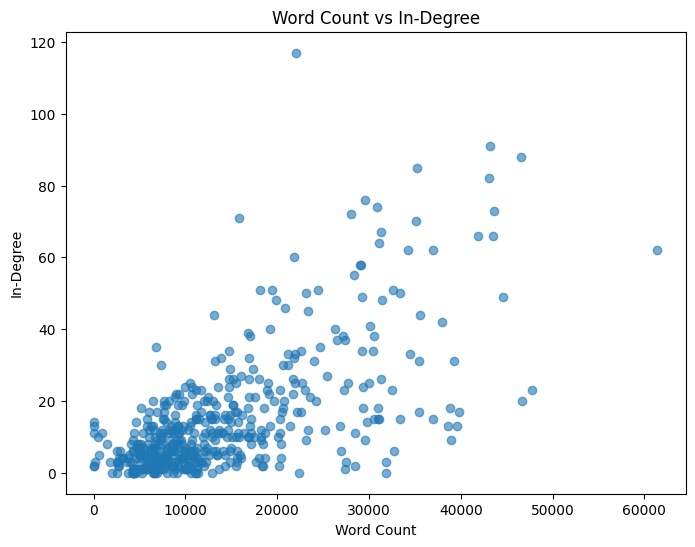

Correlation between Word Count and In-Degree: 0.6499026540506494
Pearson Correlation between Word Count and In-Degree: 0.649902654050649
Spearman Correlation between Word Count and In-Degree: 0.6045090127879214


In [79]:

# plot word count vs in degree
from scipy import stats


plt.figure(figsize=(8,6))
plt.scatter(word_counts, in_degrees, alpha=0.6)
plt.xlabel('Word Count')
plt.ylabel('In-Degree')
plt.title('Word Count vs In-Degree')
plt.show()

# pearson correlation
pearson_correlation = stats.pearsonr(word_counts, in_degrees)[0]
# spearman correlation
spearman_correlation = stats.spearmanr(word_counts, in_degrees)[0]

# print spearman and pearson
print(f"Pearson Correlation between Word Count and In-Degree: {pearson_correlation}")
print(f"Spearman Correlation between Word Count and In-Degree: {spearman_correlation}")


As the correlation is 0.65 the two parameters are strongly correlated.

Are both questions true? If yes, which phenomenon is stronger? Explain your results in your own words.

The slope on the second plot in vs word count is greater, hereby the phenomenon is of bigger influence (hmm rigtig formulering??). The correlation is almost the same for the two, but with a slightly better spearman correlation for out vs word count, making it a stronger correlation.

---
#### **Exercise 4: Centralities, assortativity and more.**

Earlier, we found the most connected nodes (using degree centrality).

Now let's dig in and try to understand more about the network using more advanced features.

Note: Not all of the measures we'll be considering below are defined for directed graphs. Only use the undirected graph when explicitly stated in the exercise.
1. Find the 5 most central characters according to degree centrality.
2. Find the 5 most central characters according to betweenness centrality.
    - Repeat Exercise 1 (plotting the network). However, this time use betweenness centrality to define the size of the node.
    - What role do you imagine characters with high wikipedia graph betweenness centrality play in the network?
3. Find the 5 most central characters according to eigenvector centrality. Calculate centrality corresponding to both in- and out-edges (see NetworkX documentation for details).
    - Repeat Exercise 1 one final time (depending on which visualization method you liked the most). However, this time use eigenvector centrality to define the size of the node.
    - What role do you imagine characters with high wikipedia graph eigenvector centrality play? Describe what is different about betweenness centrality and eigenvector centrality using your visualizations as examples.
4. Plot the betweenness centrality of nodes vs their degree centrality. Is there a correlation between the two? Did you expect that? Why?
    - Repeat the scatter plot using eigenvector centrality instead of betweenness centrality. Do you observe any difference relative to above? Why?
5. Is the undirected version of the graph assortative with respect to degree? (e.g. do high-degree characters tend to link to other high-degree characters, and low-degree characters to other low-degree characters?). Provide an interpretation of your answer.
6. Is the undirected version of the graph assortative with respect do the length_of_content nodal properties? (e.g. do characters with long Wikipedia pages tend to link to other charakters with long Wiki-pages, and vice versa?.
    - Hint: Use this function. Provide an interpretation of your answer.
7. What is the average shortest path length? Is it similar to the one of a random graph with the same number of nodes N and probablity of connection p?
    - Take a look at the distribution of shortest paths for the two networks (create a histogram for each network) to better compare and contrast. Explain what you see in your own words.
    
---

#### punkt 1

In [82]:
# Find the 5 most central characters according to degree centrality.

degree_centrality = nx.degree_centrality(G)
# sort by centrality
sorted_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
# get top 5
top_5_central = sorted_centrality[:5]
print("Top 5 most central characters by degree centrality:")
for character, centrality in top_5_central:
    print(f"{character}: {centrality}")

Top 5 most central characters by degree centrality:
Led_Zeppelin: 0.3008298755186722
Black_Sabbath: 0.27593360995850624
Queen_(band): 0.27385892116182575
Metallica: 0.2697095435684647
Alice_in_Chains: 0.25103734439834025


#### punkt 2

Betweenness centrality: how often a node lies on the shortest paths between other pairs of nodes in a graph.

In [86]:
#Find the 5 most central characters according to betweenness centrality.
betweenness_centrality = nx.betweenness_centrality(G)
# sort by centrality
sorted_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
# get top 5
top_5_betweenness = sorted_betweenness[:5]
print("Top 5 most central characters by betweenness centrality:")
for character, centrality in top_5_betweenness:
    print(f"{character}: {centrality}")

Top 5 most central characters by betweenness centrality:
Deep_Purple: 0.04213378571432792
Queen_(band): 0.03988120094273809
Alice_in_Chains: 0.03671229931070515
Guns_N'_Roses: 0.03602228306569008
Jimi_Hendrix: 0.03328283193068664


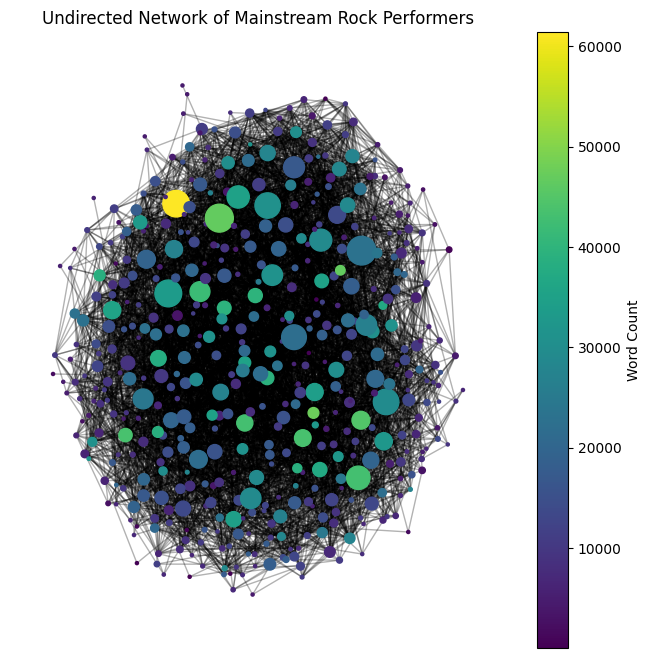

In [98]:
# Repeat Exercise 1 (plotting the network). 
# However, this time use betweenness centrality to define the size of the node.

# convert directed graph to undirected graph
G_undirected = G.to_undirected()

# plot the undirected graph
plt.figure(figsize=(8,8))
# pos = nx.spring_layout(G_undirected, seed=42, k = 0.8)  # positions for all 
pos = nx.forceatlas2_layout(G_undirected, seed=42, strong_gravity=True)  # positions for all nodes
# node sizes based on betweenness centrality

node_sizes = [5 + 10000 * betweenness_centrality[n] for n in G_undirected.nodes()]
# node colors based on word count (content length)
node_colors = [G_undirected.nodes[n]['word_count'] for n in G_undirected.nodes()]
nodes = nx.draw_networkx_nodes(G_undirected, pos, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.viridis)
edges = nx.draw_networkx_edges(G_undirected, pos, alpha=0.3)
plt.colorbar(nodes, label='Word Count')
plt.title('Undirected Network of Mainstream Rock Performers')
plt.axis('off')
plt.show()

What role do you imagine characters with high wikipedia graph betweenness centrality play in the network?

I imagine that they build bridges between subgenres and different eras. They would be on the skortest paths between otherwise disconnected bands.
Maybe they are bands that have exprimented with different subgenres of rock music or have collaborated with bands in different styles.  



#### punkt 3

Eigenvector centrality: a measure of a node's influence within a network, where connections to other highly central nodes contribute more to a node's score than connections to less central nodes. Unlike degree centrality, which only counts the number of connections, eigenvector centrality considers the quality of connections. A node is deemed more influential if it is connected to other influential nodes, a concept quantified through the principal eigenvector of a network's adjacency matrix

- Det er bedre at have connections til nodes med mange connections end connelctions til noder med få connections

In [95]:
# Find the 5 most central characters according to eigenvector centrality. 
# Calculate centrality corresponding to both in- and out-edges (see NetworkX documentation for details).
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)
# sort by centrality
sorted_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)
# get top 5
top_5_eigenvector = sorted_eigenvector[:5]
print("Top 5 most central characters by eigenvector centrality:")
for character, centrality in top_5_eigenvector:
    print(f"{character}: {centrality}")

Top 5 most central characters by eigenvector centrality:
Led_Zeppelin: 0.23145011506549815
Black_Sabbath: 0.1918117275400355
Queen_(band): 0.1826714920887961
Metallica: 0.18126590564668843
David_Bowie: 0.15869243688112653


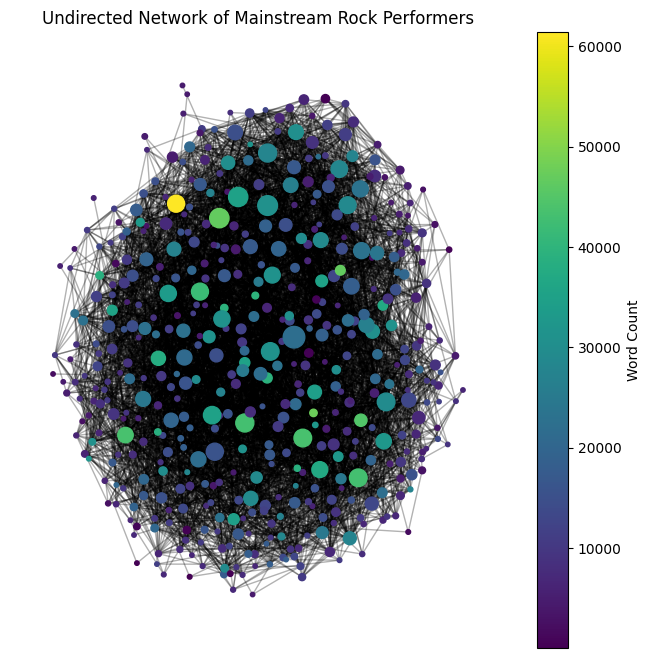

In [96]:
# Repeat Exercise 1 one final time (depending on which visualization method you liked the most).
# However, this time use eigenvector centrality to define the size of the node.

# convert directed graph to undirected graph
G_undirected = G.to_undirected()

# plot the undirected graph
plt.figure(figsize=(8,8))
# pos = nx.spring_layout(G_undirected, seed=42, k = 0.8)  # positions for all 
pos = nx.forceatlas2_layout(G_undirected, seed=42, strong_gravity=True)  # positions for all nodes
# node sizes based on eigenvector centrality
node_sizes = [10 + 1000 * eigenvector_centrality[n] for n in G_undirected.nodes()]
# node colors based on word count (content length)
node_colors = [G_undirected.nodes[n]['word_count'] for n in G_undirected.nodes()]

nodes = nx.draw_networkx_nodes(G_undirected, pos, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.viridis)
edges = nx.draw_networkx_edges(G_undirected, pos, alpha=0.3)
plt.colorbar(nodes, label='Word Count')
plt.title('Undirected Network of Mainstream Rock Performers')
plt.axis('off')
plt.show()


What role do you imagine characters with high wikipedia graph eigenvector centrality play? Describe what is different about betweenness centrality and eigenvector centrality using your visualizations as examples.
Characters with high eigenvector centrality in the Wikipedia rock music network are the elite hubs. 
Unlike degree centrality, these nodes aren't just well-connected - they're connected to OTHER well-connected and influential bands. They tend to be very famous and well known bands who influenced other.

**Differences Between Betweenness and Eigenvector Centrality:**

Betweenness Centrality (Bridge-Builders):
- Identifies nodes that connect different "parts" of the network
- High betweenness = sits on many shortest paths between other nodes
- bridge different musical communities/eras

Eigenvector Centrality (Elite Influencers):
- Identifies nodes connected to other highly influential nodes
- High eigenvector = has connections within the influential "core" nodes
- "Authority figures" within the most influential cluster of bands

Visually i find it hard to see in the graphs... I would assume that:
- Betweenness centrality nodes often appear in positions between clusters.
- Eigenvector centrality nodes tend to be clustered together in the dense, central core of the network.


A node can have high eigenvector centrality but low betweenness if it's in the "inner circle" but doesn't bridge to outlying groups.

#### punkt 4

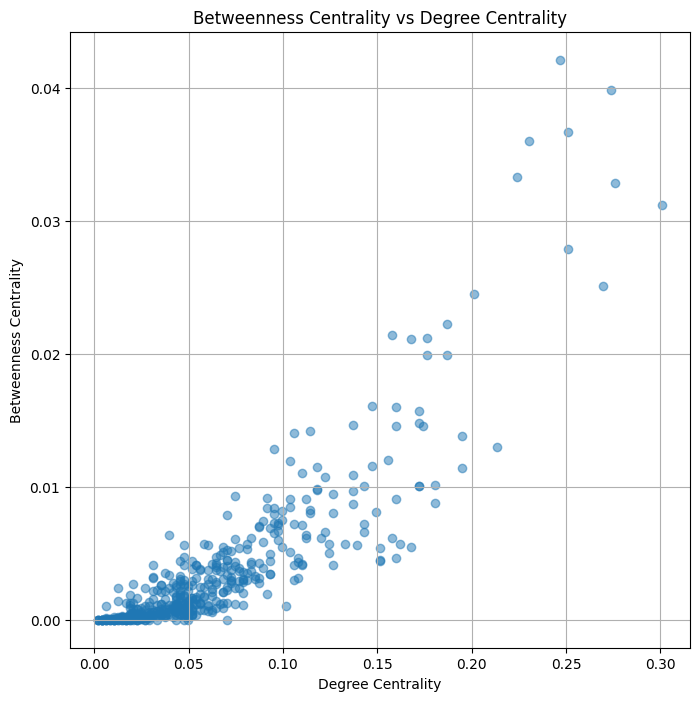

In [99]:
# Plot the betweenness centrality of nodes vs their degree centrality. 
# Is there a correlation between the two? Did you expect that? Why?

betweenness_values = list(betweenness_centrality.values())
degree_values = list(degree_centrality.values())

plt.figure(figsize=(8,8))
plt.scatter(degree_values, betweenness_values, alpha=0.5)
plt.title('Betweenness Centrality vs Degree Centrality')
plt.xlabel('Degree Centrality')
plt.ylabel('Betweenness Centrality')
plt.grid()
plt.show()


Der er en ret tydelig lineær tendens mellem degree centrality and betweenness centrality. 
Dette giver god mening, da nodes med mange connections (high degree centrality) ofte også ligger på mange shortest paths mellem andre nodes (high betweenness centrality). Jo flere connections en node har, jo større er sandsynligheden for at den ligger på shortest paths mellem andre node pairs. Dog er der en del outliers, da der helt sikkert er flere noder med få connections, som er vigtige for shortest paths, som er tydelige bridge-builders mellem clusters. 

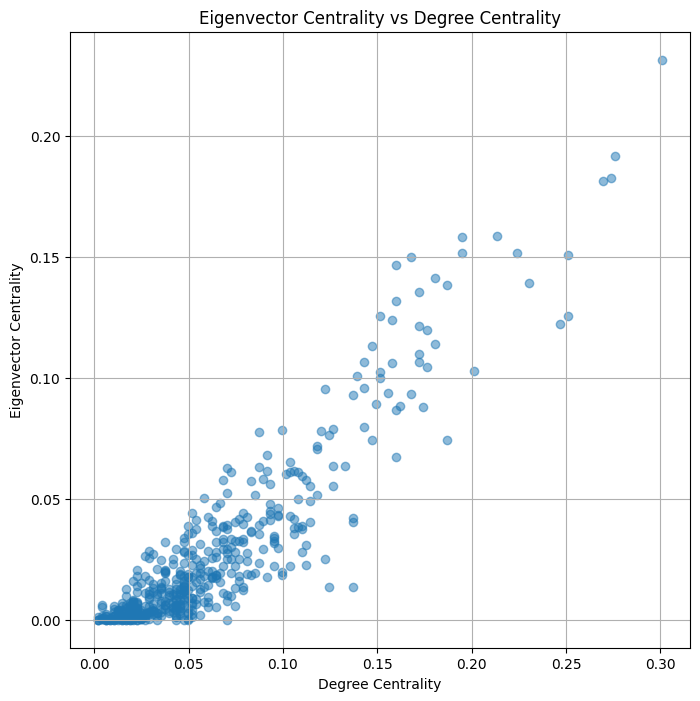

Correlation between Degree and Betweenness Centrality: 0.874
Correlation between Degree and Eigenvector Centrality: 0.918


In [100]:
# Repeat the scatter plot using eigenvector centrality instead of betweenness centrality. 
# Do you observe any difference relative to above? Why?

eigenvector_values = list(eigenvector_centrality.values())
degree_values = list(degree_centrality.values())

plt.figure(figsize=(8,8))
plt.scatter(degree_values, eigenvector_values, alpha=0.5)
plt.title('Eigenvector Centrality vs Degree Centrality')
plt.xlabel('Degree Centrality')
plt.ylabel('Eigenvector Centrality')
plt.grid()
plt.show()

# Calculate correlations for comparison
from scipy import stats

# Betweenness vs Degree correlation
betweenness_degree_corr = stats.pearsonr(degree_values, betweenness_values)[0]
print(f"Correlation between Degree and Betweenness Centrality: {betweenness_degree_corr:.3f}")

# Eigenvector vs Degree correlation
eigenvector_degree_corr = stats.pearsonr(degree_values, eigenvector_values)[0]
print(f"Correlation between Degree and Eigenvector Centrality: {eigenvector_degree_corr:.3f}")

Her er der også en tyd lineær tendens, enda lidt stærkere end for betweenness centrality. 

"Fewer outliers in the eigenvector plot because it's mathematically more related to degree centrality"

#### punkt 5 

In [ ]:
# 
# (e.g. do high-degree characters tend to link to other high-degree characters, and low-degree 
# characters to other low-degree characters?). Provide an interpretation of your answer.


